# Module-2 : Data Pre-processing steps

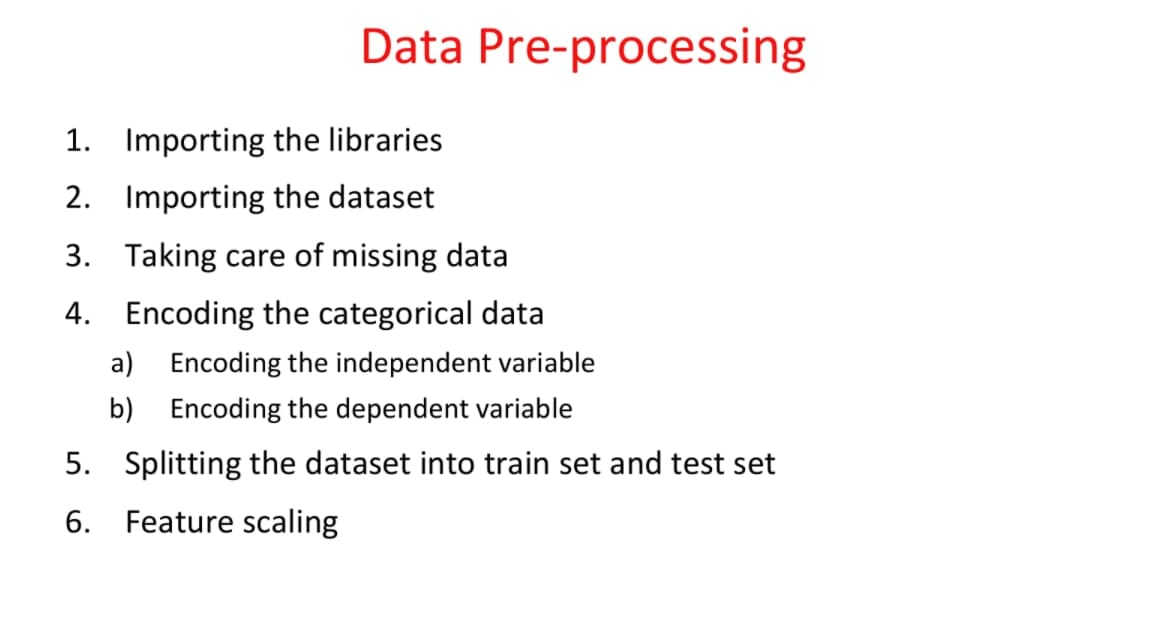

# Importing libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset:

#### Dataset in csv:

In [25]:
dataset = pd.read_csv("Data.csv")
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


#### Dataset in csv separated by semi colon:

In [3]:
dataset = pd.read_csv("Data_with_semicolon.csv",sep=";")
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


#### Dataset in text file separated by space:

In [4]:
dataset = pd.read_csv("Data.txt",sep=" ")
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


#### Dataset in is in online csv:

In [5]:
sheet_url = "https://docs.google.com/spreadsheets/d/1draNa-llHj0EJPqzt-T-9OY_u9NdOdLaEZQIVCIrKvY/edit#gid=887210153"
url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
url

'https://docs.google.com/spreadsheets/d/1draNa-llHj0EJPqzt-T-9OY_u9NdOdLaEZQIVCIrKvY/export?format=csv&gid=887210153'

In [6]:
dataset = pd.read_csv(url)
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


#### Dataset in excel file:

In [7]:
excelfile1 = pd.ExcelFile("Data.xlsx")

In [8]:
excelfile1.sheet_names

['Data']

In [9]:
dataset = excelfile1.parse('Data')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# Taking care of missing data

In [11]:
dataset.isna().any() # there is missing data in age and salary

Country      False
Age           True
Salary        True
Purchased    False
dtype: bool

In [12]:
dataset.isna().sum() # there is 1 missing data in age and salary

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [13]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


-  we can drop the missing data points row 
-  we can see that the 'germany' and 'spain' rows are dropped
-  Hence the dataset is free from missing points

In [14]:
dataset.dropna(axis=0,how="any",inplace=True)
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


- we can fill the missing data points 
- we can see that the nan values is filled by 33 

In [17]:
dataset= dataset.fillna(33)
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,33.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,33.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


- we use the <b>method ffill</b> to fill the missing data with previous datapoint

In [19]:
dataset= dataset.fillna(method='ffill')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,61000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,35.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


- we can also fill the missing data points by <b>taking the mean</b>
- for that we import a<b> package from sklearn.impute called SimpleImputer</b>

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
imputer = SimpleImputer(missing_values=np.nan,strategy="mean")

In [26]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [27]:
X[:,1:3]
X[:,1:3] = imputer.fit_transform(X[:,1:3])

In [28]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

# Encoding the Independent Variable (one hot encoding)

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [30]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder="passthrough")

In [31]:
X = ct.fit_transform(X)

In [32]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

# Encoding the dependent Variable (Label Encoding)

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
y = le.fit_transform(y)

In [35]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

# Splitting the dataset into train set and test set

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [37]:
X_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0]], dtype=object)

In [38]:
X_test

array([[0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object)

In [39]:
y_train

array([1, 0, 1, 0, 0, 0, 1, 0])

In [40]:
y_test

array([1, 1])

# Feature Scaling
### Standardization

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc = StandardScaler()

In [43]:
X_train[:,3:]

array([[35.0, 58000.0],
       [44.0, 72000.0],
       [48.0, 79000.0],
       [30.0, 54000.0],
       [38.0, 61000.0],
       [38.77777777777778, 52000.0],
       [37.0, 67000.0],
       [50.0, 83000.0]], dtype=object)

In [44]:
X_test[:,3:]

array([[40.0, 63777.77777777778],
       [27.0, 48000.0]], dtype=object)

In [45]:
X_train[:,3:] = sc.fit_transform(X_train[:,3:])

In [46]:
X_train

array([[1.0, 0.0, 0.0, -0.8066752374797969, -0.7213204519277457],
       [1.0, 0.0, 0.0, 0.6176450728387547, 0.5817100418772143],
       [1.0, 0.0, 0.0, 1.250676321869222, 1.2332252887796944],
       [0.0, 1.0, 0.0, -1.597964298767881, -1.093614878729163],
       [0.0, 0.0, 1.0, -0.3319018007069463, -0.4420996318266829],
       [0.0, 0.0, 1.0, -0.20881239117324418, -1.2797620921298716],
       [1.0, 0.0, 0.0, -0.4901596129645631, 0.11634200837544287],
       [0.0, 1.0, 0.0, 1.5671919463844557, 1.6055197155811116]],
      dtype=object)

In [47]:
X_test[:,3:] = sc.fit_transform(X_test[:,3:])

In [48]:
X_test

array([[0.0, 1.0, 0.0, 1.0, 1.0],
       [0.0, 0.0, 1.0, -1.0, -1.0]], dtype=object)

In [49]:
X_test[:,3:] = sc.transform(X_test[:,3:])

In [50]:
X_test

array([[0.0, 1.0, 0.0, -5.0, -7.08438028169014],
       [0.0, 0.0, 1.0, -5.3076923076923075, -7.0846338028169]],
      dtype=object)